In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=1234)

In [3]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

100 0.908621218526554
150 0.90918548067303
200 0.9091972027887782
250 0.9088112421031269
300 0.9091048124140564
350 0.9089673524669509
400 0.9088750093955865
450 0.9089345214960569
best_val   =  200
best_score =  0.9091972027887782


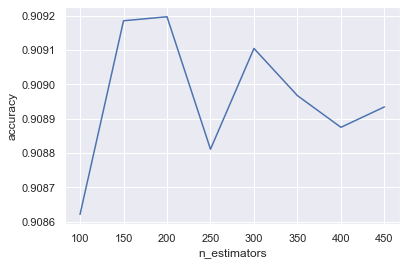

In [17]:
from sklearn.ensemble import RandomForestRegressor
scores = []
best_val = 0
best_score = 0
nes = np.arange(100, 500, 50)

for ne in nes:
    model = RandomForestRegressor(n_estimators = ne, random_state = 1234)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = ne
    print(ne, score)

fig = sns.lineplot(x=nes, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

1 0.8103114723913498
2 0.8409048811502083
3 0.8602724925991363
4 0.8726193651650272
5 0.8780549396749104
6 0.8864572652860468
7 0.8864258893891507
8 0.891670270342911
9 0.8930778473535861
10 0.895304859094657
11 0.8981681660935319
12 0.8978630860648065
13 0.8998089344192284
14 0.8995279778751173
15 0.900034040678639
16 0.8998105530791505
17 0.901629407177842
18 0.9029649233674805
19 0.9042459006965878
20 0.9024611943980306
21 0.9017878033103922
22 0.9037744379283079
23 0.9051734138775062
24 0.9050488332624154
25 0.9052125202554832
26 0.9052985269557766
27 0.9055390644226377
28 0.905045805305913
29 0.9059611941553168
30 0.906817376298267
31 0.9061634610296904
32 0.9065047749386241
33 0.9065744537805491
34 0.9068704360537134
35 0.9077943239733166
36 0.9066186533218524
37 0.9073086807727588
38 0.9067675771664492
39 0.9066376680770417
40 0.9077106958159982
41 0.9069292667785793
42 0.9071489102899587
43 0.9084339508261722
44 0.9089304401767542
45 0.9083260000324376
46 0.908765981304194
47 0

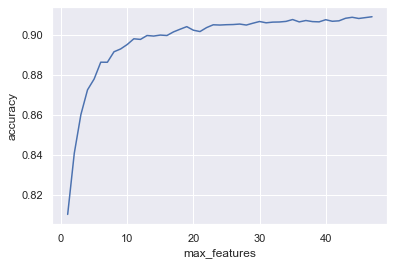

In [18]:
#Bester Wert bei 200
scores = []
best_val = 0
best_score = 0
mfs = range(1, 48)

for mf in mfs:
    model = RandomForestRegressor(n_estimators= 200, max_features = mf, random_state = 1234)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = mf
    print(mf, score)


fig = sns.lineplot(x=mfs, y=scores)
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

0.0 0.9091972027887782
0.05 0.9093578120706901
0.1 0.9092100131205805
0.15000000000000002 0.9089637132510155
0.2 0.9089062071095662
0.25 0.9091138486359449
0.30000000000000004 0.9089112585355774
0.35000000000000003 0.9088732486718142
0.4 0.9086988033948157
0.45 0.9086208219767865
0.5 0.9086180795581569
0.55 0.9085815671993713
0.6000000000000001 0.9086012506992298
0.65 0.9088641433551454
0.7000000000000001 0.9088594591743261
0.75 0.9089712871788219
0.8 0.9088618884515922
0.8500000000000001 0.9089225551689898
0.9 0.9091345759389993
0.9500000000000001 0.9091107919452306
best_val   =  0.05
best_score =  0.9093578120706901


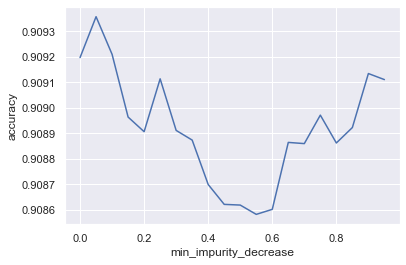

In [19]:
# Bester Wert: keiner

scores = []
best_val = 0
best_score = 0
mids = np.arange(0, 1, 0.05)
score = 0

for mid in mids:
    model = RandomForestRegressor(n_estimators= 200, min_impurity_decrease = mid, random_state = 1234)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = mid
    print(mid, score)

fig = sns.lineplot(x=mids, y=scores)
plt.xlabel('min_impurity_decrease')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

In [ ]:
#Bester Wert varriert nach random state. wahrscheinlich 0 am geeignetsten

